In [291]:
%matplotlib inline

In [292]:
# These are values defined in the Arduino code and documented in 
# "Bluetooth.java" in the application

In [299]:
D_SAMPLING_FREQUENCY = 250.0

In [300]:
# PUll in the libraries and define the functions we will be using

In [301]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def getChannelData(iChannel, strTestCase):
    cwd = os.getcwd()
    cwd = cwd+'\\TrainingData\\'+strTestCase

    f = []
    for (dirpath, dirnames, filenames) in os.walk(cwd):
        f.extend(filenames)
        break
        
    strFileSearch = 'Trace0' + str(iChannel)
    strFiles = filter(lambda x:strFileSearch in x, f)
    
    
    for idx in range(0, len(strFiles)):
        fh = open(cwd+'\\'+strFiles[idx], 'rb')
        # read the data into numpy
        if(idx==0):
            x = np.fromfile(fh, dtype=('>f'))
        else:
            x = np.append(x, np.fromfile(fh, dtype=('>f')))
        fh.close()
    
    return (x,strFiles)

def getDataAsFrame(strTestCase):

    (x1,strFiles1) = getChannelData(1,strFolder)
    (x2,strFiles2) = getChannelData(2,strFolder)
    (x3,strFiles3) = getChannelData(3,strFolder)
    (x4,strFiles4) = getChannelData(4,strFolder)
    t = np.divide(range(0,x1.size),D_SAMPLING_FREQUENCY)

    dfData = pd.DataFrame(data={'Ch1':x1, 'Ch2':x2, 'Ch3':x3, 'Ch4':x4, 't':t})
    
    return dfData
    
    

In [302]:
# Begin by getting the data into python and plotting it out.

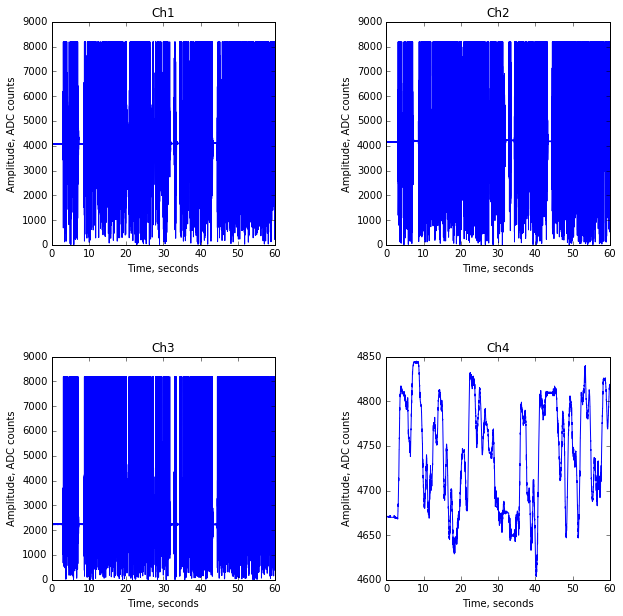

In [305]:
strFolder = 'Cobble2'
dfData = getDataAsFrame(strFolder)

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(wspace=.5, hspace=0.5)

ax = dfData.plot(x='t', y='Ch1', ax=axes[0,0], legend=False, figsize=(10,10))
ax.set_xlabel('Time, seconds')
ax.set_ylabel('Amplitude, ADC counts')
ax.set_title('Ch1')

ax = dfData.plot(x='t', y='Ch2', ax=axes[0,1], legend=False)
ax.set_xlabel('Time, seconds')
ax.set_ylabel('Amplitude, ADC counts')
ax.set_title('Ch2')

ax = dfData.plot(x='t', y='Ch3', ax=axes[1,0], legend=False)
ax.set_xlabel('Time, seconds')
ax.set_ylabel('Amplitude, ADC counts')
ax.set_title('Ch3')

ax = dfData.plot(x='t', y='Ch4', ax=axes[1,1], legend=False)
ax.set_xlabel('Time, seconds')
ax.set_ylabel('Amplitude, ADC counts')
ax.set_title('Ch4')




In [306]:
dfData.head()

,Ch1,Ch2,Ch3,Ch4,t
0,4076.0,4158.0,2237.0,4671.0,0.000
1,4080.0,4159.0,2229.0,4671.0,0.004
2,4077.0,4158.0,2228.0,4671.0,0.008
3,4077.0,4164.0,2250.0,4671.0,0.012
4,4082.0,4160.0,2236.0,4671.0,0.016
